<a href="https://colab.research.google.com/github/AI4Finance-Foundation/ElegantRL/blob/master/tutorial_Pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pendulum-v1 Example in ElegantRL**






# **Part 1: Testing Task Description**

[Pendulum-v1](https://gym.openai.com/envs/Pendulum-v0/): the inverted pendulum swingup problem is a classic problem in the control literature. In this version of the problem, the pendulum starts in a random position, and the goal is to swing it up so it stays upright.

# **Part 2: Install ElegantRL**

In [1]:
# install elegantrl library
!pip install git+https://github.com/AI4Finance-LLC/ElegantRL.git

  Cloning https://github.com/AI4Finance-LLC/ElegantRL.git to /tmp/pip-req-build-sa5nwqiq
  Running command git clone -q https://github.com/AI4Finance-LLC/ElegantRL.git /tmp/pip-req-build-sa5nwqiq
     |████████████████████████████████| 89.3 MB 24 kB/s 
     |████████████████████████████████| 448 kB 64.4 MB/s 
  Created wheel for elegantrl: filename=elegantrl-0.3.2-py3-none-any.whl size=82359 sha256=b647ac676e0eae40fc575447003ecb9c71444d3ef0a175901503890d5f7a27a8
  Stored in directory: /tmp/pip-ephem-wheel-cache-w60p8yr0/wheels/52/9a/b3/08c8a0b5be22a65da0132538c05e7e961b1253c90d6845e0c6
Successfully built elegantrl


# **Part 3: Import Packages**


*   **elegantrl**
*   **OpenAI Gym**: a toolkit for developing and comparing reinforcement learning algorithms.
*   **PyBullet Gym**: an open-source implementation of the OpenAI Gym MuJoCo environments.



In [7]:
from elegantrl.train.run_tutorial import *
from elegantrl.train.config import Arguments
from elegantrl.agents.AgentPPO import AgentPPO
from elegantrl.envs.Gym import build_env
import gym
gym.logger.set_level(40) # Block warning

# **Part 4: Specify Agent and Environment**

*   **args.agent**: firstly chooses one DRL algorithm to use, and the user is able to choose any agent from agent.py
*   **args.env**: creates and preprocesses the environment, and the user can either customize own environment or preprocess environments from OpenAI Gym and PyBullet Gym from env.py.


> Before finishing initialization of **args**, please see Arguments() in run.py for more details about adjustable hyper-parameters.




In [10]:
agent = AgentPPO()
env = build_env('Pendulum-v1')
args = Arguments(env, agent)

args.gamma = 0.97
args.net_dim = 2 ** 8
args.worker_num = 2
args.reward_scale = 2 ** -2
args.target_step = 200 * 16  # max_step = 200

args.eval_gap = 2 ** 5

# **Part 5: Train and Evaluate the Agent**

> The training and evaluating processes are all finished inside function **train_and_evaluate()**, and the only parameter for it is **args**. It includes the fundamental objects in DRL:

*   agent,
*   environment.

> And it also includes the parameters for training-control:

*   batch_size,
*   target_step,
*   reward_scale,
*   gamma, etc.

> The parameters for evaluation-control:

*   break_step,
*   random_seed, etc.






In [11]:
train_and_evaluate(args) # the training process will terminate once it reaches the target reward.

| Remove cwd: ./AgentPPO_Pendulum-v0_(0,)
################################################################################
ID     Step    maxR |    avgR   stdR   avgS  stdS |    expR   objC   etc.
0  3.20e+03-1308.24 |
0  3.20e+03-1308.24 |-1308.24  283.3    199     0 |   -1.42   2.76  -0.01  -0.50
0  3.20e+04-1308.24 |-1391.26  365.0    199     0 |   -1.55   1.44   0.02  -0.50
0  6.08e+04-1308.24 |-1361.47  266.7    199     0 |   -1.39   1.16  -0.04  -0.50
0  8.96e+04-1281.24 |
0  8.96e+04-1281.24 |-1281.24  240.4    199     0 |   -1.61   1.04  -0.02  -0.50
0  1.18e+05-1281.24 |-1431.78  247.5    199     0 |   -1.49   0.57   0.04  -0.50
0  1.47e+05-1034.29 |
0  1.47e+05-1034.29 |-1034.29   81.1    199     0 |   -1.28   0.51   0.04  -0.50
0  1.76e+05 -947.32 |
0  1.76e+05 -947.32 | -947.32  240.7    199     0 |   -1.28   0.46  -0.02  -0.50
0  2.05e+05 -947.32 |-1034.36   54.2    199     0 |   -1.17   0.53   0.01  -0.50
0  2.34e+05 -899.98 |
0  2.34e+05 -899.98 | -899.98   82.6    199  

Understanding the above results::
*   **Step**: the total training steps.
*  **MaxR**: the maximum reward.
*   **avgR**: the average of the rewards.
*   **stdR**: the standard deviation of the rewards.
*   **objA**: the objective function value of Actor Network (Policy Network).
*   **objC**: the objective function value (Q-value)  of Critic Network (Value Network).

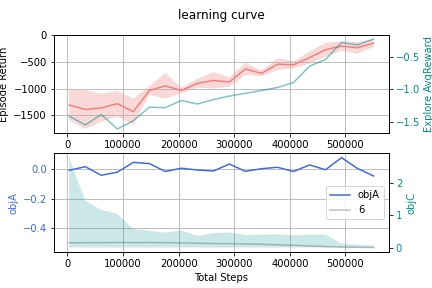

In [13]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread(f"/content/{args.cwd}/plot_learning_curve.jpg", cv2.IMREAD_UNCHANGED)
cv2_imshow(img)